In [1]:
import torch as pt
import torchvision as tv
import os
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from GeneticSolver import *
from ImageGeneticSolver import *
import imageio

In [2]:
data = np.load('mnist.npz')
X, y = data['X'], data['y']
X_train, X_test, y_train, y_test = train_test_split(X / 255., y, test_size=.2, random_state=42)

In [3]:
image_size = X[0].shape

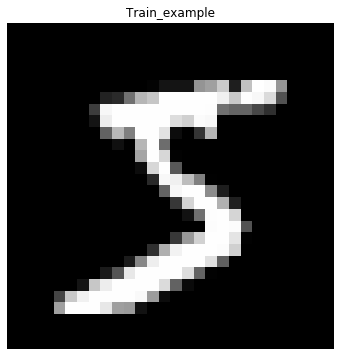

In [131]:
plt.figure(figsize=(6, 6));
plt.imshow(X[0], cmap=plt.cm.Greys_r);
plt.axis('off');
plt.title("Data example");

In [5]:
class CNN(pt.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = pt.nn.Sequential(
        pt.nn.Conv2d(1, 30, 3),
        pt.nn.MaxPool2d(2),
        pt.nn.ReLU(),
        pt.nn.Conv2d(30, 30, 3),
        pt.nn.MaxPool2d(2),
        pt.nn.ReLU(),
        pt.nn.Conv2d(30, 15, 3),
        pt.nn.MaxPool2d(2),
        pt.nn.ReLU(),
        pt.nn.Flatten(),
        pt.nn.Linear(15, 64),
        pt.nn.ReLU(),
        pt.nn.Linear(64, 10),
        pt.nn.Softmax()
        )
    
    def predict(self, X):
        return self.model(X)


model = CNN()
optim = pt.optim.Adam(model.parameters())
loss = pt.nn.CrossEntropyLoss()

In [6]:
X_train = pt.Tensor(X_train).unsqueeze(1)
y_train = pt.Tensor(y_train).long()
X_test = pt.Tensor(X_test).unsqueeze(1)
y_test = pt.Tensor(y_test).long()
train_loader = pt.utils.data.DataLoader(pt.utils.data.TensorDataset(X_train, y_train), batch_size=32)
test_loader = pt.utils.data.DataLoader(pt.utils.data.TensorDataset(X_test, y_test), batch_size=32)

In [7]:
epochs = 3
pt.manual_seed(42)
for epoch in range(epochs):
    for Xt, yt in tqdm.tqdm(train_loader):
        optim.zero_grad()
        yp = model.predict(Xt)
        L = loss(yp, yt)
        L.backward()
        optim.step()
    
    with pt.no_grad():
        predictions = []
        for Xt, yt in tqdm.tqdm(test_loader):
            y_pred = model.predict(Xt)
            predictions.append(y_pred.argmax(axis=1))
        test_predictions = pt.cat(predictions)
        accuracy = (test_predictions == y_test).sum().float() / len(y_test)
        print(f'val acc = {accuracy}')
    

  0%|          | 0/1500 [00:00<?, ?it/s]/Volumes/Storage/goinfre/ptyshevs/env/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
  0%|          | 6/1500 [00:00<00:27, 55.17it/s]

val acc = 0.9362499713897705


  0%|          | 5/1500 [00:00<00:32, 46.21it/s]

val acc = 0.9521666765213013


100%|██████████| 375/375 [00:02<00:00, 130.49it/s]

val acc = 0.952750027179718


In [52]:
def show_digits(images):
    top_4 = images[:4]
    pred = model.predict(top_4)
    labels = pred.argmax(axis=1)
    f, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0, 0].imshow(top_4[0].squeeze(), cmap=plt.cm.Greys_r)
    ax[0, 0].set_title(f'Predicted class: {labels[0]}')
    ax[0, 0].axis('off')
    
    ax[0, 1].imshow(top_4[1].squeeze(), cmap=plt.cm.Greys_r)
    ax[0, 1].set_title(f'Predicted class: {labels[1]}')
    ax[0, 1].axis('off')
    
    ax[1, 0].imshow(top_4[2].squeeze(), cmap=plt.cm.Greys_r)
    ax[1, 0].set_title(f'Predicted class: {labels[2]}')
    ax[1, 0].axis('off')
    
    ax[1, 1].imshow(top_4[3].squeeze(), cmap=plt.cm.Greys_r)
    ax[1, 1].set_title(f'Predicted class: {labels[3]}')
    ax[1, 1].axis('off')
    return f

In [54]:
top_n = 3
figure = show_digits(X_test)
plt.savefig('CNN_predictions.png', bbox_inches='tight')
plt.close(figure)

/Volumes/Storage/goinfre/ptyshevs/env/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [56]:
adv_target = 7

In [57]:
def fitness_class_probability(X):
    """ Maximize probability of adversarial target class"""
    y = model.predict(pt.Tensor(X).unsqueeze(1)).detach().numpy()
    y_target = y[:, adv_target]
    return y_target

In [83]:
m = ImageGeneticSolver(image_size=image_size, population_size=200, verbosity=True, warm_start=True, patience=200)

In [84]:
res, score = m.solve(fitness_class_probability, n_generations=2000, verbose_step=50, write_images=True, image_prefix='7_max/')

Generation #: best score
Generation  50 :  6.021825e-08
Generation  100 :  1.7512276e-06
Generation  150 :  0.00024197323
Generation  200 :  0.0071339086
Generation  250 :  0.06444163
Generation  300 :  0.28171912
Generation  350 :  0.5730769
Generation  400 :  0.8383798
Generation  450 :  0.9269765
Generation  500 :  0.9708846
Generation  550 :  0.98166394
Generation  600 :  0.9894404
Generation  650 :  0.99294335
Generation  700 :  0.9953406
Generation  750 :  0.9963445
Generation  800 :  0.9969394
Generation  850 :  0.9972562
Generation  900 :  0.99753237
Generation  950 :  0.99777156
Generation  1000 :  0.997934
Generation  1050 :  0.9980102
Generation  1100 :  0.9980604
Generation  1150 :  0.99809104
Generation  1200 :  0.99810034
Generation  1250 :  0.9981034
Generation  1300 :  0.99810433
Generation  1350 :  0.9981046
Generation  1400 :  0.9981046
Early stopping on generation  1438  with best score  0.9981046


In [97]:
def dir_to_gif(dirname, duration=.3):
    images = []
    for fname in os.listdir(dirname):
        if fname.endswith('png'):
            images.append(imageio.imread(f'{dirname}/{fname}'))
    imageio.mimsave(f'{dirname}.gif', images, duration=duration)
dir_to_gif('7_max')

In [100]:
def visualize(adversary_example, adversary_score):
    y_pred = model.predict(pt.Tensor(adversary_example).unsqueeze(0).unsqueeze(1))
    assert np.isclose(y_pred.sum().item(), 1)
    target_prob = y_pred[0][adv_target].item()
    plt.figure(figsize=(6, 6))
    plt.imshow(adversary_example, cmap=plt.cm.Greys_r);
    plt.axis('off')
    plt.title(f"P(X={adv_target})={target_prob:.4f}|Fitness={adversary_score:.4f}");

/Volumes/Storage/goinfre/ptyshevs/env/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


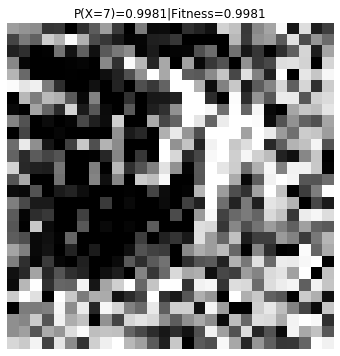

In [101]:
visualize(res, score)

In [103]:
def fitness_class_probability_empty(X):
    """ Maximize probability of adversarial target class, penalizing mean pixel intensity"""
    y = model.predict(pt.Tensor(X).unsqueeze(1)).detach().numpy()
    y_target = y[:, adv_target]
    X_mean = X.mean(axis=1).mean(axis=1)
    return y_target - X_mean

In [112]:
adv_target = 5
m = ImageGeneticSolver(image_size=image_size, verbosity=True, population_size=300, verbose_step=100, warm_start=True, patience=300, random_state=42)
res, score = m.solve(fitness_class_probability_empty, n_generations=5000, verbose_step=50, write_images=True, image_prefix='5_max_empty/')

/Volumes/Storage/goinfre/ptyshevs/env/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Generation #: best score
Generation  50 :  -0.39562977889528644
Generation  100 :  -0.32517703600917974
Generation  150 :  0.08650783502314241
Generation  200 :  0.31419908740286534
Generation  250 :  0.744888576454863
Generation  300 :  0.7839582794924379
Generation  350 :  0.8163550631423578
Generation  400 :  0.8414615312636482
Generation  450 :  0.863516835451301
Generation  500 :  0.8821114498932118
Generation  550 :  0.8958721560637434
Generation  600 :  0.9082315137407885
Generation  650 :  0.9189622519053263
Generation  700 :  0.927881802144031
Generation  750 :  0.9343580614722425
Generation  800 :  0.9403072346764345
Generation  850 :  0.9445057865340766
Generation  900 :  0.94774576040627
Generation  950 :  0.9501684147645453
Generation  1000 :  0.9521758718573802
Generation  1050 :  0.9531401285130504
Generation  1100 :  0.9535712573795455
Generation  1150 :  0.9536292508449487
Generation  1200 :  0.9543533028610708
Generation  1250 :  0.954661903626102
Generation  1300 :  

In [116]:
dir_to_gif('5_max_empty', duration=.1)

In [114]:
res.mean()

0.0433942833623187

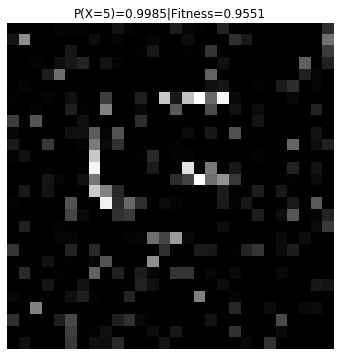

In [115]:
visualize(res, score)

Generation #: best score
Generation  700 :  0.8100469314450032
Generation  1400 :  0.8767762963227459
Generation  2100 :  0.9019891509684078
Generation  2800 :  0.9116790787245544
Generation  3500 :  0.9183711626685269
Generation  4200 :  0.9232360799480105
Generation  4900 :  0.9259910948011922
Generation  5600 :  0.928072632081943
Generation  6300 :  0.929520465703687
Generation  6999 :  0.932954514417909


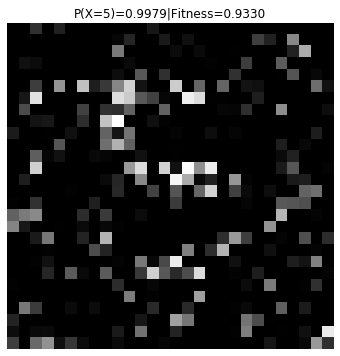

In [119]:
adv_target = 5
m = GeneticSolver(image_size=image_size, verbosity=True, verbosity_step=100, warm_start=True, random_state=42, early_stopping=False)
res, score = m.solve(fitness_class_probability_empty, n_generations=7000, verbose_step=700)
visualize(res, score)

In [126]:
def fitness_similarity(X):
    """ Maximize adv_target probability s.t. MSE from adv_sample """
    y = model.predict(pt.Tensor(X).unsqueeze(1)).detach().numpy()
    y_target = y[:, adv_target]
    mse = np.sqrt(np.power(X - adv_sample, 2).mean(axis=1).mean(axis=1))
    return y_target - mse

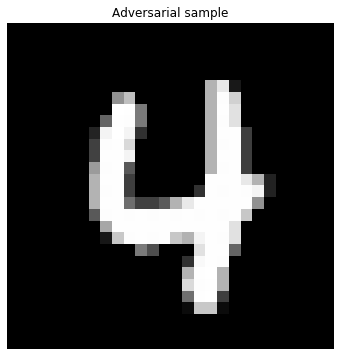

In [132]:
adv_sample = X_test[9].numpy()
plt.figure(figsize=(6, 6));
plt.imshow(adv_sample.squeeze(), cmap=plt.cm.Greys_r);
plt.axis('off');
plt.title("Adversarial sample");
plt.savefig('adv_sample.png', bbox_inches='tight');

/Volumes/Storage/goinfre/ptyshevs/env/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Generation #: best score
Generation  50 :  0.48978839766618276
Generation  100 :  0.5568179382735332
Generation  150 :  0.6194630448409415
Generation  200 :  0.6701971282784307
Generation  250 :  0.7104020962845162
Generation  300 :  0.739995460330581
Generation  350 :  0.7708480512505271
Generation  400 :  0.7896278388253464
Generation  450 :  0.8053652250394125
Generation  500 :  0.8191702391486093
Generation  550 :  0.8328648211973304
Generation  600 :  0.8425323266375198
Generation  650 :  0.851584922113141
Generation  700 :  0.8590774778215147
Generation  750 :  0.8651480409666457
Generation  800 :  0.8718886457116168
Generation  850 :  0.8763458523617671
Generation  900 :  0.8806297519758512
Generation  950 :  0.8837580181781973
Generation  1000 :  0.8861626119284192
Generation  1050 :  0.8879217874367072
Generation  1100 :  0.889424981269299
Generation  1150 :  0.8909432938304344
Generation  1200 :  0.8916602097682603
Generation  1250 :  0.8927417775052152
Generation  1300 :  0.

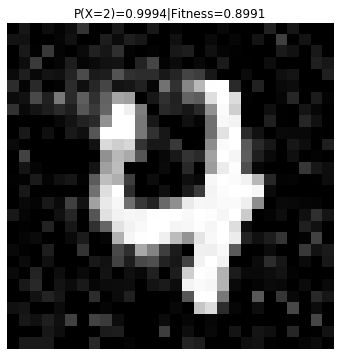

In [128]:
adv_target = 2
m = ImageGeneticSolver(image_size=image_size, population_size=300, verbosity=True, patience=300,
                  verbose_step=100, warm_start=True, random_state=42)
res, score = m.solve(fitness_similarity, n_generations=5000, verbose_step=50, write_images=True, image_prefix='4_to_2/')
visualize(res, score)

In [129]:
dir_to_gif('4_to_2', duration=.1)